In [8]:
import pandas as pd

# Prédire les notes que les élèves aurons au bacs, selon les notes qui ont eu dans les matières sur l'année

# Simuler données réel
# Ya deux informations crucial:
# - Les données sur lequels s'appuyer pour prédire une résulat (les notes en dehors du bac)
# - La donnée (les notes du bac)
df = pd.DataFrame({
    'maths' : [12, 8, 15, 10, 15, 8, 16, 19, 13, 12, 8, 15, 10, 15, 8, 16, 19, 13],
    'francais' : [14, 9, 16, 11, 15, 1, 2, 4, 5, 12, 8, 15, 10, 15, 8, 16, 19, 13],
    'histoire' : [13, 10, 15, 14, 18, 12, 17, 10, 8, 12, 8, 15, 10, 15, 8, 16, 19, 13],
    'bac' : [15, 18, 9, 4, 15, 10, 1, 5, 8, 12, 8, 15, 10, 15, 8, 16, 10, 13],
})

In [9]:
# Etape : Séparation
from sklearn.model_selection import train_test_split

# x = les données sur lesquels s'appuyer
x = df[['maths', 'francais', 'histoire']]

# y = la prediction
y = df['bac']

# x_train = 80% des données réel sur "lesquels s'appuyer" pour s'entrainer (80% des notes des élèves)
# x_test = 20% restant des données réel "lesquels s'appuyer" pour qui s'auto test (20% des notes des élèves)
# y_train = 80% des données réel "prédites" pour s'entrainer (80% des notes du bac)
# y_test = 20% restant des données réel "prédites" pour qui s'auto test (20% des notes du bac)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# ETAPE : Dire à l'ia de s'entrainer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Instancier un modèle video pré écrit
#model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, random_state=0)
# Entrainer le modèle à prédire y_train en s'appuyant sur x_train
# Entrainer le modèle à prédire les notes du bacs en s'appuyant sur les notes de l'année
model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [11]:
# Tester la prédiction
df_prediction = pd.DataFrame({
    'maths' : [5, 20],
    'francais' : [4, 6],
    'histoire' : [14, 7]
})
# Tester de prédire les notes du bacs avec deux élèves
# 1. Utiliser le model.predict en paranthese (les nouvelles données sur lequels s'appuyer pour prédire)
# 2. Utiliser le model.predict; le return (la prédiction)
#----------------------------
# 1. Utiliser le model.predict en paranthese (les notes des nouveaux eleves)
# 2. Pour prédire; le return leurs notes au bac
predictions_test = model.predict(df_prediction)

print(predictions_test)

[5.03 6.83]


In [12]:
# Regarder le MSE
from sklearn.metrics import mean_squared_error

# Pour avoir le MSE
# Il faut le même nombre d'eleve que dans le y_test
# Il faut le même nombre d'eleve prédict que dans les 20% des eleves réels (pourquoi 20% par ce que on split a 0.2)
# Dans notre cas on aait 4 élèves reel, 20% de 4 = 1
# Donc 1 eleve
df_un_seul_eleve = pd.DataFrame({
    'maths' : [5, 9, 10, 12],
    'francais' : [4, 13, 10, 4],
    'histoire' : [14, 20, 10, 3]
})

print(f'Nombre eleve split en y_test : {y_test}')

predict_for_mse = model.predict(df_un_seul_eleve)
print(f'Prediction de sa note au Bac : {predict_for_mse}')

mse = mean_squared_error(y_test, predict_for_mse)
print(f'MSE du model de prédiction : {mse}')

Nombre eleve split en y_test : 0    15
1    18
8     8
5    10
Name: bac, dtype: int64
Prediction de sa note au Bac : [ 5.03 12.51  8.2   6.64]
MSE du model de prédiction : 35.21765


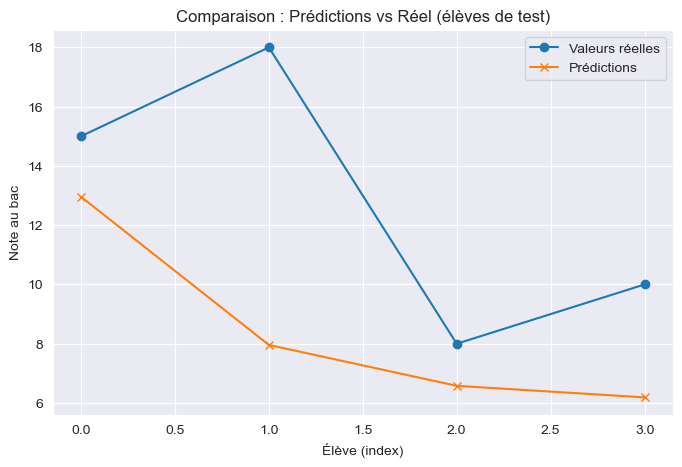

In [13]:
import matplotlib.pyplot as plt

# 1. Prédire les valeurs sur X_test (les mêmes élèves que y_test)
y_pred = model.predict(x_test)

# 2. Graphique : comparaison cohérente
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Valeurs réelles', marker='o')
plt.plot(y_pred, label='Prédictions', marker='x')
plt.title('Comparaison : Prédictions vs Réel (élèves de test)')
plt.xlabel('Élève (index)')
plt.ylabel('Note au bac')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Exporter ton modèle en pkl
# Reutiliser ton modèle à l'exterieur (comme un executable)
import pickle

# Save
with open('../models/model_predic_bac_4_eleves_forest.pkl', 'wb') as file:
    pickle.dump(model, file)